In [128]:
from requests import get
import io
import pandas as pd

In [147]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import matplotlib as mpl

In [3]:
    endpoint = (
        'https://api.coronavirus.data.gov.uk/v1/data?'
        'filters=areaType=nation;areaName=england&'
        'structure={"date":"date","newCases":"newCasesByPublishDate"}'
    )

In [49]:
response = get(endpoint, timeout=10)

In [50]:
response

<Response [200]>

In [150]:
df = pd.DataFrame.from_dict(response.json()['data'], orient="columns")

In [116]:
df.head(2)

,date,newCases
0,2022-02-17,40376
1,2022-02-16,42756


In [154]:
df["date"] = df["date"].astype("datetime64")

In [155]:
df.set_index('date', inplace=True)

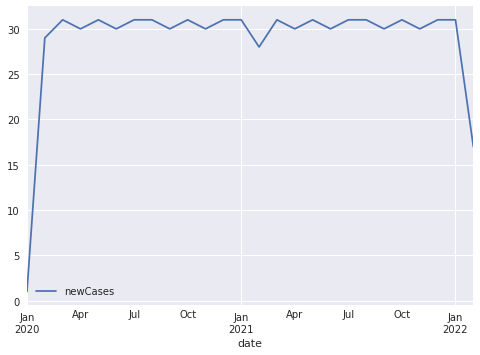

In [171]:
ax = df.resample('M').count().plot(kind="line")